In [1]:
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

from env import get_db_url
import acquire
import summarize


In [2]:
zillow = acquire.get_zillow_data()

In [3]:
zillow.shape

(77381, 67)

In [4]:
zillow.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
typeconstructiontypeid,222.00,6.04,0.56,4.00,6.00,6.00,6.00,13.00
storytypeid,50.00,7.00,0.00,7.00,7.00,7.00,7.00,7.00
propertylandusetypeid,"77,381.00",261.83,5.14,31.00,261.00,261.00,266.00,275.00
heatingorsystemtypeid,"49,440.00",3.92,3.59,1.00,2.00,2.00,7.00,24.00
buildingclasstypeid,15.00,3.93,0.26,3.00,4.00,4.00,4.00,4.00
architecturalstyletypeid,206.00,7.39,2.73,2.00,7.00,7.00,7.00,21.00
airconditioningtypeid,"24,953.00",1.81,2.97,1.00,1.00,1.00,1.00,13.00
parcelid,"77,381.00","13,007,150.51","3,481,345.65","10,711,855.00","11,538,305.00","12,531,568.00","14,211,831.00","167,689,317.00"
logerror,"77,381.00",0.02,0.17,-4.66,-0.02,0.01,0.04,5.26
basementsqft,50.00,679.72,689.70,38.00,273.00,515.00,796.50,"3,560.00"


In [5]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77381 entries, 0 to 77579
Data columns (total 67 columns):
typeconstructiontypeid          222 non-null float64
storytypeid                     50 non-null float64
propertylandusetypeid           77381 non-null float64
heatingorsystemtypeid           49440 non-null float64
buildingclasstypeid             15 non-null float64
architecturalstyletypeid        206 non-null float64
airconditioningtypeid           24953 non-null float64
parcelid                        77381 non-null int64
logerror                        77381 non-null float64
transactiondate                 77381 non-null object
basementsqft                    50 non-null float64
bathroomcnt                     77381 non-null float64
bedroomcnt                      77381 non-null float64
buildingqualitytypeid           49672 non-null float64
calculatedbathnbr               76772 non-null float64
decktypeid                      614 non-null float64
finishedfloor1squarefeet     

In [6]:
# find nulls by collumns
count_missing = zillow.isnull().sum()
average_missing = count_missing/zillow.shape[0]
missing_cols = pd.DataFrame({'num_rows_missing': count_missing, 'pct_rows_missing': average_missing})
missing_cols.head(3)

,num_rows_missing,pct_rows_missing
typeconstructiontypeid,77159,1.00
storytypeid,77331,1.00
propertylandusetypeid,0,0.00


better to just drop collumns with more than 75% info missing

In [7]:
features = missing_cols[missing_cols.pct_rows_missing < .75].index.tolist()

In [8]:
num_cols_missing = zillow.isnull().sum(axis = 1)
pct_cols_missing = num_cols_missing/zillow.shape[1]
num_rows = pd.DataFrame({'num_rows':num_cols_missing}).groupby(num_cols_missing).count()
num_pct = pd.DataFrame({'num_cols_missing': num_cols_missing, 'pct_cols_missing': pct_cols_missing})
missing_stats = pd.merge(num_pct, num_rows, left_on='num_cols_missing', right_on=num_rows.index).drop_duplicates()
missing_stats = missing_stats.sort_values('num_cols_missing').reset_index(drop = True)
missing_stats

,num_cols_missing,pct_cols_missing,num_rows
0,23,0.34,2
1,24,0.36,13
2,25,0.37,24
3,26,0.39,65
4,27,0.40,316
5,28,0.42,455
6,29,0.43,5270
7,30,0.45,3455
8,31,0.46,9891
9,32,0.48,12579


In [9]:
acquire.nulls_by_row(zillow[features])

,num_cols_missing,pct_cols_missing,num_rows
0,2,0.05,10428
1,3,0.08,10387
2,4,0.11,13972
3,5,0.13,13258
4,6,0.16,2627
5,7,0.18,4657
6,8,0.21,15917
7,9,0.24,4764
8,10,0.26,698
9,11,0.29,383


In [64]:
from prepare import handle_missing_values
df = handle_missing_values(zillow, .975,.75)

In [65]:
prop_required_row = .75

thresh = int(df.shape[1]*.75) + 1
df.dropna(thresh= thresh)

,propertylandusetypeid,parcelid,logerror,transactiondate,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,...,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc
0,261.00,14297519,0.03,2017-01-01,3.50,4.00,3.50,"3,100.00","6,059.00",3.00,...,"96,978.00",0.00,"1,998.00","485,713.00","1,023,282.00","2,016.00","537,569.00","11,013.72","60,590,630,072,012.00",Single Family Residential
1,261.00,17052889,0.06,2017-01-01,1.00,2.00,1.00,"1,465.00","6,111.00",1.00,...,"97,099.00",5.00,"1,967.00","88,000.00","464,000.00","2,016.00","376,000.00","5,672.48","61,110,010,023,006.00",Single Family Residential
2,261.00,14186244,0.01,2017-01-01,2.00,3.00,2.00,"1,243.00","6,059.00",2.00,...,"97,078.00",6.00,"1,962.00","85,289.00","564,778.00","2,016.00","479,489.00","6,488.30","60,590,218,022,012.00",Single Family Residential
3,261.00,12177905,-0.10,2017-01-01,3.00,4.00,3.00,"2,376.00","6,037.00",3.00,...,"96,330.00",0.00,"1,970.00","108,918.00","145,143.00","2,016.00","36,225.00","1,777.51","60,373,001,001,006.00",Single Family Residential
4,266.00,10887214,0.01,2017-01-01,3.00,3.00,3.00,"1,312.00","6,037.00",3.00,...,"96,451.00",0.00,"1,964.00","73,681.00","119,407.00","2,016.00","45,726.00","1,533.89","60,371,236,012,000.00",Condominium
5,266.00,17143294,-0.02,2017-01-01,2.00,3.00,2.00,"1,492.00","6,111.00",2.00,...,"97,091.00",6.00,"1,982.00","198,640.00","331,064.00","2,016.00","132,424.00","3,508.10","61,110,053,062,009.00",Condominium
6,261.00,12095076,-0.00,2017-01-01,3.00,4.00,3.00,"2,962.00","6,037.00",3.00,...,"96,293.00",0.00,"1,950.00","276,684.00","773,303.00","2,016.00","496,619.00","9,516.26","60,374,608,001,014.00",Single Family Residential
7,261.00,12069064,0.10,2017-01-01,1.00,2.00,1.00,738.00,"6,037.00",1.00,...,"96,325.00",0.00,"1,922.00","18,890.00","218,552.00","2,016.00","199,662.00","2,366.08","60,373,020,041,001.00",Single Family Residential
70,261.00,11018202,0.02,2017-01-02,1.00,2.00,1.00,812.00,"6,037.00",1.00,...,"96,366.00",0.00,"1,917.00","21,513.00","40,746.00","2,016.00","19,233.00",668.70,"60,371,095,003,018.00",Single Family Residential
71,261.00,10808296,0.01,2017-01-02,3.00,3.00,3.00,"2,406.00","6,037.00",3.00,...,"96,387.00",0.00,"1,979.00","289,137.00","605,540.00","2,016.00","316,403.00","7,345.85","60,371,375,023,002.00",Single Family Residential


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77375 entries, 0 to 77579
Data columns (total 26 columns):
propertylandusetypeid           77375 non-null float64
parcelid                        77375 non-null int64
logerror                        77375 non-null float64
transactiondate                 77375 non-null object
bathroomcnt                     77375 non-null float64
bedroomcnt                      77375 non-null float64
calculatedbathnbr               76772 non-null float64
calculatedfinishedsquarefeet    77185 non-null float64
fips                            77375 non-null float64
fullbathcnt                     76772 non-null float64
latitude                        77375 non-null float64
longitude                       77375 non-null float64
propertycountylandusecode       77375 non-null object
rawcensustractandblock          77375 non-null float64
regionidcity                    75910 non-null float64
regionidcounty                  77375 non-null float64
regionidzip    

In [67]:
# for i in df.columns.tolist():
#     for j in df.columns.tolist():
#         if i in j and i != j:
#             df.drop(j, axis = 1, inplace = True)

In [68]:
from prepare import get_single_unit_properties
get_single_unit_properties(df)

,propertylandusetypeid,parcelid,logerror,transactiondate,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,...,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc
0,261.00,14297519,0.03,2017-01-01,3.50,4.00,3.50,"3,100.00","6,059.00",3.00,...,"96,978.00",0.00,"1,998.00","485,713.00","1,023,282.00","2,016.00","537,569.00","11,013.72","60,590,630,072,012.00",Single Family Residential
1,261.00,17052889,0.06,2017-01-01,1.00,2.00,1.00,"1,465.00","6,111.00",1.00,...,"97,099.00",5.00,"1,967.00","88,000.00","464,000.00","2,016.00","376,000.00","5,672.48","61,110,010,023,006.00",Single Family Residential
2,261.00,14186244,0.01,2017-01-01,2.00,3.00,2.00,"1,243.00","6,059.00",2.00,...,"97,078.00",6.00,"1,962.00","85,289.00","564,778.00","2,016.00","479,489.00","6,488.30","60,590,218,022,012.00",Single Family Residential
3,261.00,12177905,-0.10,2017-01-01,3.00,4.00,3.00,"2,376.00","6,037.00",3.00,...,"96,330.00",0.00,"1,970.00","108,918.00","145,143.00","2,016.00","36,225.00","1,777.51","60,373,001,001,006.00",Single Family Residential
6,261.00,12095076,-0.00,2017-01-01,3.00,4.00,3.00,"2,962.00","6,037.00",3.00,...,"96,293.00",0.00,"1,950.00","276,684.00","773,303.00","2,016.00","496,619.00","9,516.26","60,374,608,001,014.00",Single Family Residential
7,261.00,12069064,0.10,2017-01-01,1.00,2.00,1.00,738.00,"6,037.00",1.00,...,"96,325.00",0.00,"1,922.00","18,890.00","218,552.00","2,016.00","199,662.00","2,366.08","60,373,020,041,001.00",Single Family Residential
70,261.00,11018202,0.02,2017-01-02,1.00,2.00,1.00,812.00,"6,037.00",1.00,...,"96,366.00",0.00,"1,917.00","21,513.00","40,746.00","2,016.00","19,233.00",668.70,"60,371,095,003,018.00",Single Family Residential
71,261.00,10808296,0.01,2017-01-02,3.00,3.00,3.00,"2,406.00","6,037.00",3.00,...,"96,387.00",0.00,"1,979.00","289,137.00","605,540.00","2,016.00","316,403.00","7,345.85","60,371,375,023,002.00",Single Family Residential
72,261.00,11023776,0.09,2017-01-02,1.00,2.00,1.00,776.00,"6,037.00",1.00,...,"96,361.00",0.00,"1,946.00","38,030.00","164,836.00","2,016.00","126,806.00","2,086.91","60,371,045,002,008.00",Single Family Residential
73,261.00,12871444,0.04,2017-01-02,2.00,3.00,2.00,"1,059.00","6,037.00",2.00,...,"96,507.00",0.00,"1,955.00","51,776.00","187,119.00","2,016.00","135,343.00","2,481.45","60,374,021,012,005.00",Single Family Residential


In [69]:
summarize.nulls_by_col(df)

,num_rows_missing,pct_rows_missing
propertylandusetypeid,0,0.00
parcelid,0,0.00
logerror,0,0.00
transactiondate,0,0.00
bathroomcnt,0,0.00
bedroomcnt,0,0.00
calculatedbathnbr,603,0.01
calculatedfinishedsquarefeet,190,0.00
fips,0,0.00
fullbathcnt,603,0.01


In [70]:
df.groupby('propertylandusedesc').count()

,propertylandusetypeid,parcelid,logerror,transactiondate,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,...,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
propertylandusedesc,,,,,,,,,,,,,,,,,,,,,
Cluster Home,333,333,333,333,333,333,333,333,333,333,...,333,333,333,333,333,333,333,333,333,333
Commercial/Office/Residential Mixed Used,15,15,15,15,15,15,0,15,15,0,...,15,15,15,15,15,15,15,15,15,12
Condominium,19293,19293,19293,19293,19293,19293,19222,19233,19293,19222,...,19293,19276,19293,19232,19284,19293,19293,19293,19292,19190
Cooperative,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
"Duplex (2 Units, Any Combination)",2009,2009,2009,2009,2009,2009,1844,2007,2009,1844,...,2009,2007,2009,1989,2003,2009,2009,2009,2009,2007
"Manufactured, Modular, Prefabricated Homes",58,58,58,58,58,58,35,51,58,35,...,58,57,58,52,48,58,58,58,58,58
Mobile Home,74,74,74,74,74,74,60,61,74,60,...,74,74,74,61,73,74,74,73,74,74
Planned Unit Development,1942,1942,1942,1942,1942,1942,1942,1941,1942,1942,...,1942,1940,1942,1942,1942,1942,1942,1942,1942,1935
"Quadruplex (4 Units, Any Combination)",727,727,727,727,727,727,618,724,727,618,...,727,727,727,714,725,727,727,727,727,726


In [71]:
from prepare import get_single_unit_properties
get_single_unit_properties(df)

,propertylandusetypeid,parcelid,logerror,transactiondate,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,...,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc
0,261.00,14297519,0.03,2017-01-01,3.50,4.00,3.50,"3,100.00","6,059.00",3.00,...,"96,978.00",0.00,"1,998.00","485,713.00","1,023,282.00","2,016.00","537,569.00","11,013.72","60,590,630,072,012.00",Single Family Residential
1,261.00,17052889,0.06,2017-01-01,1.00,2.00,1.00,"1,465.00","6,111.00",1.00,...,"97,099.00",5.00,"1,967.00","88,000.00","464,000.00","2,016.00","376,000.00","5,672.48","61,110,010,023,006.00",Single Family Residential
2,261.00,14186244,0.01,2017-01-01,2.00,3.00,2.00,"1,243.00","6,059.00",2.00,...,"97,078.00",6.00,"1,962.00","85,289.00","564,778.00","2,016.00","479,489.00","6,488.30","60,590,218,022,012.00",Single Family Residential
3,261.00,12177905,-0.10,2017-01-01,3.00,4.00,3.00,"2,376.00","6,037.00",3.00,...,"96,330.00",0.00,"1,970.00","108,918.00","145,143.00","2,016.00","36,225.00","1,777.51","60,373,001,001,006.00",Single Family Residential
6,261.00,12095076,-0.00,2017-01-01,3.00,4.00,3.00,"2,962.00","6,037.00",3.00,...,"96,293.00",0.00,"1,950.00","276,684.00","773,303.00","2,016.00","496,619.00","9,516.26","60,374,608,001,014.00",Single Family Residential
7,261.00,12069064,0.10,2017-01-01,1.00,2.00,1.00,738.00,"6,037.00",1.00,...,"96,325.00",0.00,"1,922.00","18,890.00","218,552.00","2,016.00","199,662.00","2,366.08","60,373,020,041,001.00",Single Family Residential
70,261.00,11018202,0.02,2017-01-02,1.00,2.00,1.00,812.00,"6,037.00",1.00,...,"96,366.00",0.00,"1,917.00","21,513.00","40,746.00","2,016.00","19,233.00",668.70,"60,371,095,003,018.00",Single Family Residential
71,261.00,10808296,0.01,2017-01-02,3.00,3.00,3.00,"2,406.00","6,037.00",3.00,...,"96,387.00",0.00,"1,979.00","289,137.00","605,540.00","2,016.00","316,403.00","7,345.85","60,371,375,023,002.00",Single Family Residential
72,261.00,11023776,0.09,2017-01-02,1.00,2.00,1.00,776.00,"6,037.00",1.00,...,"96,361.00",0.00,"1,946.00","38,030.00","164,836.00","2,016.00","126,806.00","2,086.91","60,371,045,002,008.00",Single Family Residential
73,261.00,12871444,0.04,2017-01-02,2.00,3.00,2.00,"1,059.00","6,037.00",2.00,...,"96,507.00",0.00,"1,955.00","51,776.00","187,119.00","2,016.00","135,343.00","2,481.45","60,374,021,012,005.00",Single Family Residential


In [76]:
query = '''
SELECT * 
FROM customers
'''
mall_df = pd.read_sql(query, get_db_url('mall_customers'))
mall_df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [75]:
summarize.df_summary(mall_df)

--- Shape: (200, 5)
--- Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
customer_id       200 non-null int64
gender            200 non-null object
age               200 non-null int64
annual_income     200 non-null int64
spending_score    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
--- Descriptions
                customer_id  gender                  age        annual_income  \
count                200.00     200               200.00               200.00   
unique                  nan       2                  nan                  nan   
top                     nan  Female                  nan                  nan   
freq                    nan     112                  nan                  nan   
mean                 100.50     NaN                38.85                60.56   
std                   57.88     NaN                13.97                26.26   
min                    1.00     NaN            

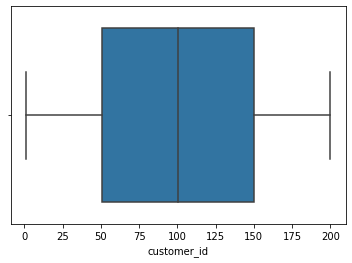

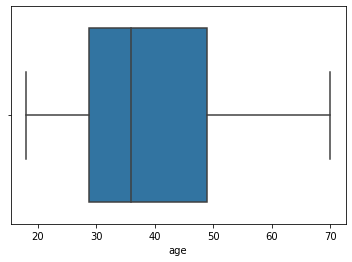

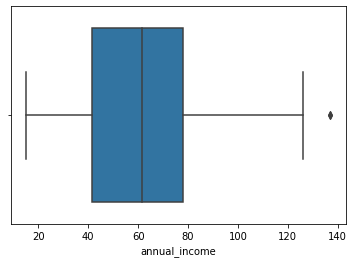

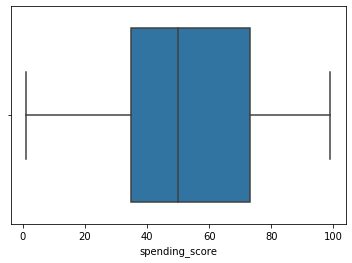

In [91]:
for i in mall_df.columns.tolist():
    if mall_df[i].dtype == int:
        sns.boxplot(i, data= mall_df)
        plt.show(
        )